# 1. Import packages


In [186]:
import sys
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Download stock price


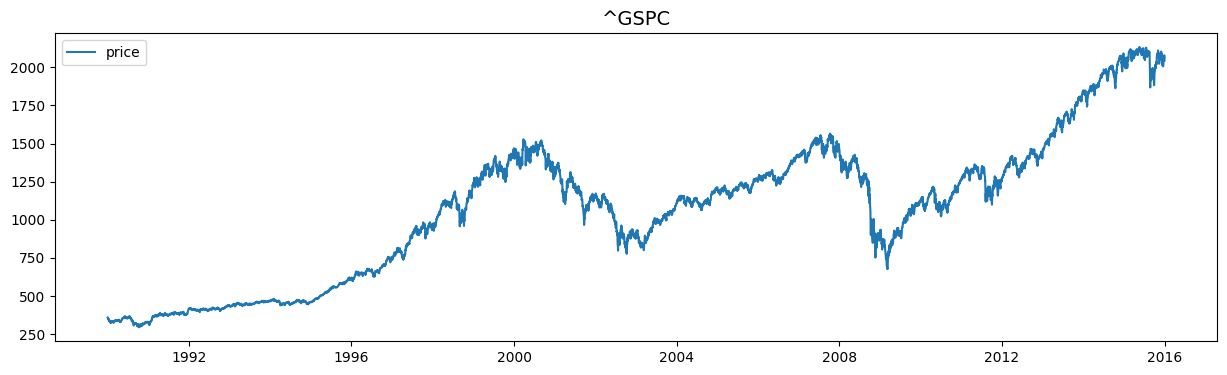

In [187]:
date_0 = '1990-01-01'
date_1 = '2016-01-01'
date_2 = '2022-01-01'
stock = "^GSPC"

data = yf.Ticker(stock).history(start=date_0, end=date_1)
price = data['Close']
x = np.array(price)

data2 = yf.Ticker(stock).history(start=date_0, end=date_2)
price2 = data2['Close']
x2 = np.array(price2)
pl.plt.figure(figsize=(15,4))
pl.plot(price,label='price')
pl.title(stock, fontsize=14)
pl.legend()
pl.show()

# 3. Count predict days


n_predict =  1511
n_x =  6553


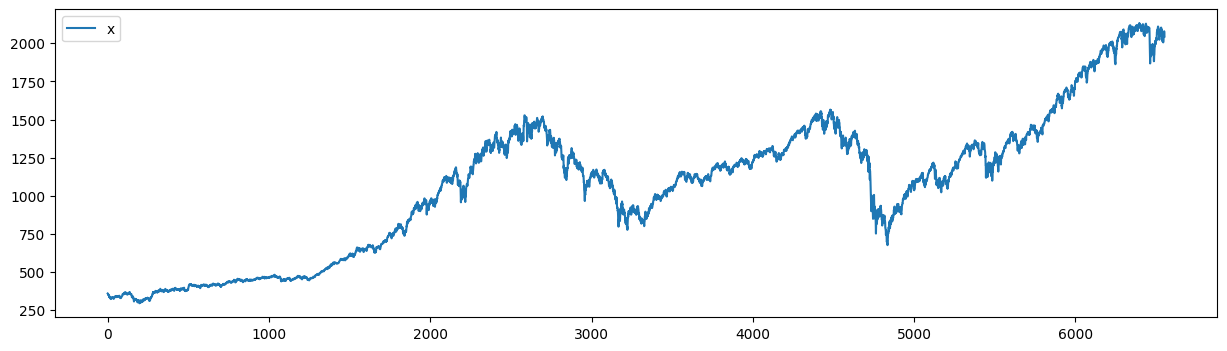

In [188]:
n_predict = price2.size - price.size
print('n_predict = ', n_predict)
n_x = x.size
print('n_x = ', n_x)
n_harm = 100                 # number of harmonics in model
t = np.arange(0, n_x)
p = np.polyfit(t, x, 1)         # find linear trend in x

x_notrend = x - p[0]*t - p[1]        # detrended x
pl.plt.figure(figsize=(15,4))
plt.plot(x,label='x')
# plt.plot(x_notrend,label='x_notrend')
pl.legend()
pl.show()


array([2.09870115e-01, 3.82110883e+02])

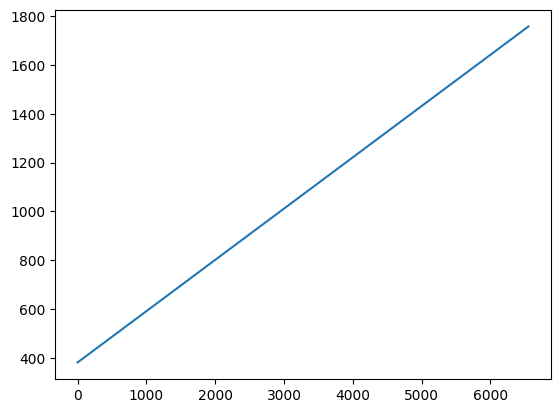

In [189]:

plt.plot(p[0]*t+p[1])
p

# 4. FFT


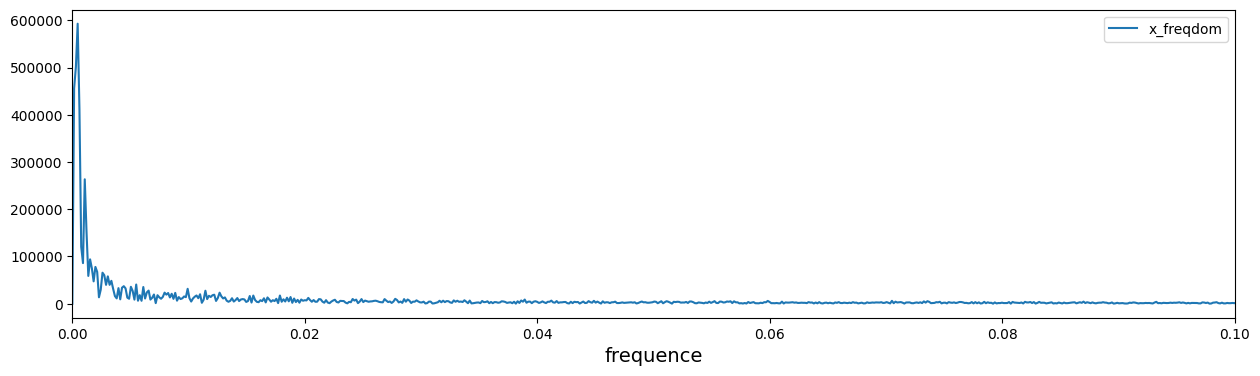

C:\Users\e4903\AppData\Local\Temp\ipykernel_7420\3036857290.py:14: RuntimeWarning: divide by zero encountered in divide
  pl.plot(1/f[mask], abs(x_freqdom[mask]) , label="freqdom")


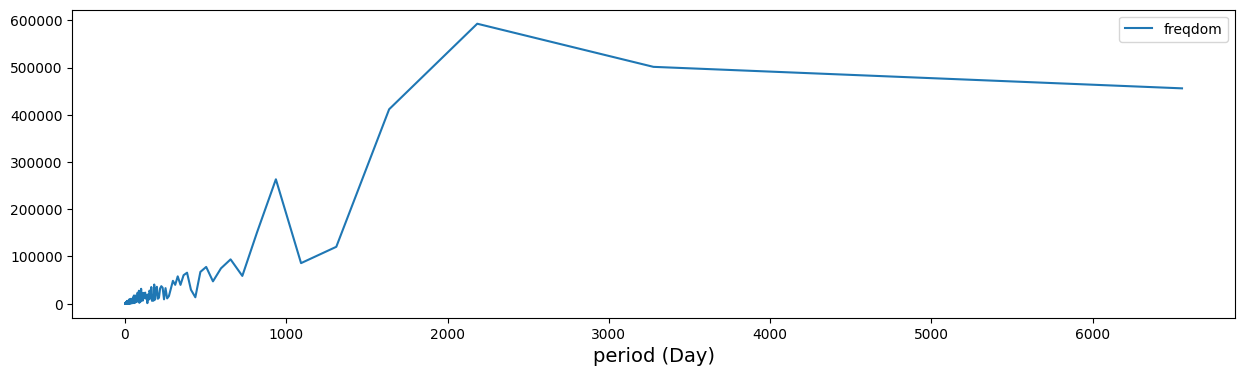

In [190]:
x_freqdom = fft.fft(x_notrend,n = n_x)        
f = fft.fftfreq(n_x)

mask = np.where(f >= 0)
# print(mask)
pl.plt.figure(figsize=(15,4))
pl.plot(f[mask], abs(x_freqdom[mask]) ,label="x_freqdom")
pl.xlim(0,0.1)
pl.xlabel('frequence', fontsize=14)
pl.legend()
pl.show()

pl.plt.figure(figsize=(15,4))
pl.plot(1/f[mask], abs(x_freqdom[mask]) , label="freqdom")
pl.xlabel('period (Day)', fontsize=14)
pl.legend()
pl.show()

# 5. Sort index by frequency or by amplitudes


In [191]:
indexes = list(range(n_x))             # frequencies

# indexes.sort(key = lambda i: np.absolute(f[i]))  # sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitudes, lower -> higher 
indexes.reverse() # sort indexes by amplitudes, higher -> lower 

In [192]:
indexes

[6550,
 3,
 2,
 6551,
 1,
 6552,
 4,
 6549,
 7,
 6546,
 8,
 6545,
 5,
 6548,
 10,
 6543,
 6,
 6547,
 6540,
 13,
 6542,
 11,
 6539,
 14,
 6536,
 17,
 18,
 6535,
 9,
 6544,
 6533,
 20,
 6531,
 22,
 12,
 6541,
 36,
 6517,
 21,
 6532,
 19,
 6534,
 29,
 6524,
 6520,
 33,
 40,
 6513,
 28,
 6525,
 6527,
 26,
 6523,
 30,
 6488,
 65,
 23,
 6530,
 16,
 6537,
 43,
 6510,
 6478,
 75,
 34,
 6519,
 42,
 6511,
 52,
 6501,
 83,
 6470,
 58,
 6495,
 54,
 6499,
 56,
 6497,
 72,
 6481,
 46,
 6507,
 53,
 6500,
 80,
 6473,
 6515,
 38,
 48,
 6505,
 6474,
 79,
 70,
 6483,
 117,
 6436,
 102,
 6451,
 6476,
 77,
 100,
 6453,
 24,
 6529,
 6469,
 84,
 6490,
 63,
 69,
 6484,
 51,
 6502,
 78,
 6475,
 6430,
 123,
 60,
 6493,
 6489,
 64,
 15,
 6538,
 6504,
 49,
 6467,
 86,
 6498,
 55,
 110,
 6443,
 6522,
 31,
 121,
 6432,
 45,
 6508,
 6420,
 133,
 6471,
 82,
 6460,
 93,
 66,
 6487,
 6482,
 71,
 90,
 6463,
 108,
 6445,
 62,
 6491,
 6528,
 25,
 6468,
 85,
 6485,
 68,
 41,
 6512,
 6428,
 125,
 6521,
 32,
 50,
 6503,
 115

# 6. Restore siganl


0
Period : 2184.3(Days)
ampli : 90.44710562424027
1
Period : 3276.5(Days)
ampli : 76.51497155419092
2
Period : 6553.0(Days)
ampli : 69.5718108505677
3
Period : 1638.3(Days)
ampli : 62.82090922472206
4
Period : 936.1(Days)
ampli : 40.19099272447196
5
Period : 819.1(Days)
ampli : 23.03112725763555
6
Period : 1310.6(Days)
ampli : 18.386126277003214
7
Period : 655.3(Days)
ampli : 14.326573798245034
8
Period : 1092.2(Days)
ampli : 13.11452385972049
9
Period : 504.1(Days)
ampli : 11.889824983928776
10
Period : 595.7(Days)
ampli : 11.430404310456156
11
Period : 468.1(Days)
ampli : 10.278781169225253
12
Period : 385.5(Days)
ampli : 10.020585169510694
13
Period : 364.1(Days)
ampli : 9.21920035203596
14
Period : 728.1(Days)
ampli : 8.981177464151212
15
Period : 327.7(Days)
ampli : 8.841256934848628
16
Period : 297.9(Days)
ampli : 7.396654333577876
17
Period : 546.1(Days)
ampli : 7.227408229490543
18
Period : 182.0(Days)
ampli : 6.198497465446113
19
Period : 312.0(Days)
ampli : 6.1011645418863205

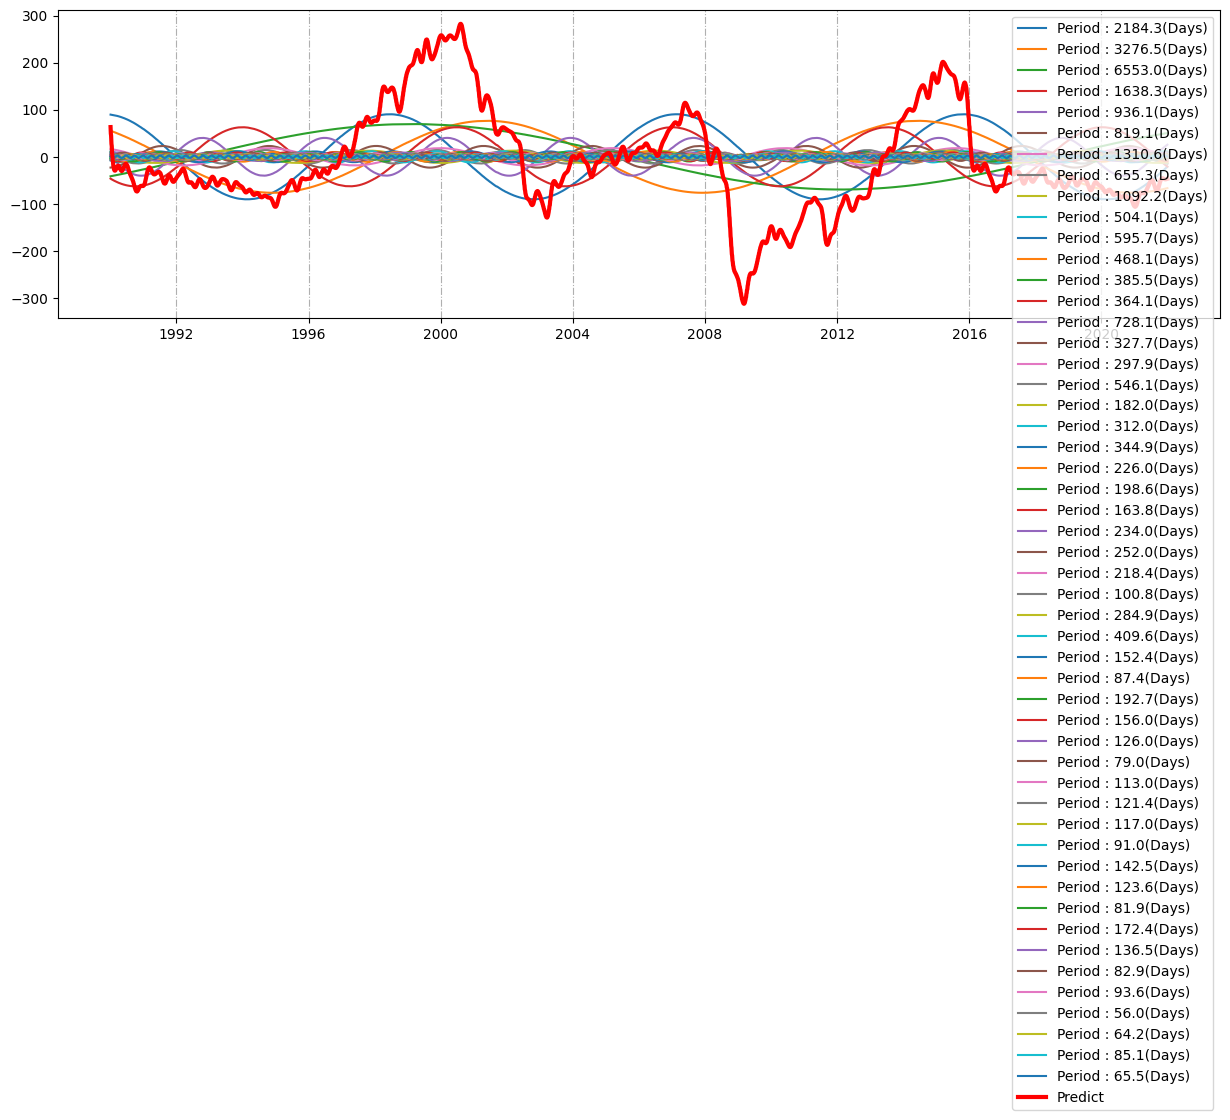

In [152]:
t = np.arange(0, n_x + n_predict)
restored_sig = np.zeros(t.size)
count = 0
ampli_list = []
phase_list = []
f_list = []
period_list = []
pl.plt.figure(figsize=(15,4))
for i in indexes[1:1 + n_harm * 2]:
    if (count <= 100 or count >= (n_harm * 2 -2)): 
        if(count % 2 == 0):
            ampli = np.absolute(x_freqdom[i]) / n_x   # amplitude
            phase = np.angle(x_freqdom[i])            # phase
            signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)
            restored_sig += signal
            num = int(count/2)
            sig_num = 'signal_' + str(num) 
            sig_period = 'Period : ' + str(round(1/abs(f[i]),1)) + '(Days)'

            ampli_list.append(ampli)
            phase_list.append(phase)
            f_list.append(f[i])
            print(num)
            period_list.append(sig_period)
            print(sig_period)
            print('ampli :', ampli)
            # fig, axes = plt.subplots(2, 1, figsize=(12, 6))
            # axes[0].plot(signal, 'b')
            # axes[0].set_xlabel(sig_period)
            # axes[1].plot(restored_sig, 'r',label = 'restored_sig')
            # axes[1].set_xlabel(sig_num)
            # pl.legend()
            # plt.tight_layout()
            # plt.show()
            pl.plot(price2.index, signal,label=sig_period)
        count += 1
        # num = int(count/2)
        # sig_num = 'signal_' + str(num) 
        # sig_period = 'Period : ' + str( 1/abs(f[i])) + '(Days)'
        # fig, axes = plt.subplots(2, 1, figsize=(12, 6))
        # axes[0].plot(signal, 'b')
        # axes[0].set_xlabel(sig_period)
        # axes[1].plot(restored_sig, 'r',label = 'restored_sig')
        # axes[1].set_xlabel(sig_num)
        # pl.legend()
        # plt.tight_layout()
        # plt.show()
signal = restored_sig
 
# pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
# pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
pl.plot(price2.index, signal, 'r',label = 'Predict',linewidth=3)
# plt.plot(price.index,x_notrend,label='x_notrend')
# plt.plot(price.index,x_notrend2,'y',label='x_notrend')
# plt.plot(price.index,x,label='x')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

signal_df = pd.DataFrame({
    'ampli' :ampli_list,
    'phase' :phase_list,
    'f' : f_list,
    'period' : period_list
})

# 7. Plot predicting


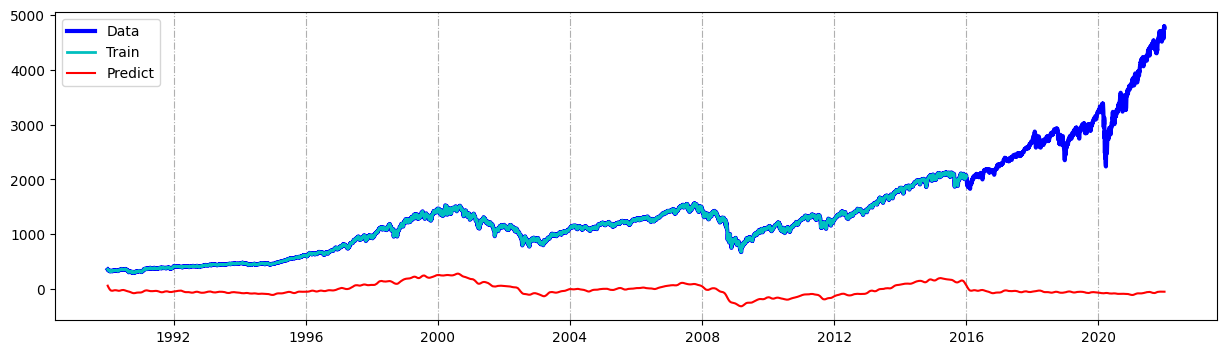

In [153]:
x_notrend2 = x - p[0] * np.arange(0, n_x)
pl.plt.figure(figsize=(15,4)) 
pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
pl.plot(price2.index, signal, 'r',label = 'Predict')
# plt.plot(price.index,x_notrend,label='x_notrend')
# plt.plot(price.index,x_notrend2,'y',label='x_notrend')
# plt.plot(price.index,x,label='x')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()

In [154]:
# tail_data = price2.size - n_predict*2
# print(tail_data)
# pl.plt.figure(figsize=(15,4))
# pl.plot(price2[tail_data:].index, x2[tail_data:], 'b', linewidth = 3,label = 'Data')
# pl.plot(price[tail_data:].index, x[tail_data:], 'c', linewidth = 2, label = 'Train')
# # pl.plot(price2[tail_data:].index, signal[tail_data:], 'r',label = 'Predict')
# pl.plt.grid(axis='x',linestyle='-.')
# plt.plot(price.index,price,'r',label='original values')
# # plt.xlabel('x axis')
# # plt.ylabel('y axis')
# plt.legend(loc=4)
# # plt.title('polyfitting')
# # plt.show()
# pl.legend()
# pl.show()

# 8. Count peaks and valleys

In [155]:
pv_range = 30

pd.options.mode.chained_assignment = None
pv = data2['Close']
data2['peaks'] = pd.Series(dtype='float64') 
data2['valleys'] = pd.Series(dtype='float64') 
peaks = data2['peaks']
valleys = data2['valleys']

for idx in range(0, len(pv)):
    if pv[idx] == pv.iloc[idx-pv_range:idx+pv_range].max():
        peaks.iloc[idx] = pv[idx]
    if pv[idx] == pv.iloc[idx-pv_range:idx+pv_range].min():
        valleys.iloc[idx] = pv[idx]
        
data2['signal'] = signal
pv2 = data2['signal']
data2['peaks2'] = pd.Series(dtype='float64') 
data2['valleys2'] = pd.Series(dtype='float64') 
peaks2 = data2['peaks2']
valleys2 = data2['valleys2']

for idx in range(0, len(pv)):
    if pv2[idx] == pv2.iloc[idx-pv_range:idx+pv_range].max():
        peaks2.iloc[idx] = pv2[idx]
    if pv2[idx] == pv2.iloc[idx-pv_range:idx+pv_range].min():
        valleys2.iloc[idx] = pv2[idx]

# 9. Count delays of peaks and valleys

In [156]:
import datetime
data3 = pd.DataFrame()
data3['peaks_1'] = data2['peaks']
data3 = data3.dropna(how='all') 
li_peak1 = list(data3['peaks_1'].index)
data4 = pd.DataFrame()
data4['peaks_2'] = data2['peaks2']
data4 = data4.dropna(how='all') 
li_peak2 = list(data4['peaks_2'].index)
li_peak = []
for i in range(0,len(li_peak2)): 
    temp = []
    for j in range(0,len(li_peak1)): 
        temp.append(abs((li_peak2[i] - li_peak1[j]).days))
    li_peak.append(min(temp))
data4['delay'] = li_peak

data5 = pd.DataFrame()
data5['valleys_1'] = data2['valleys']
data5 = data5.dropna(how='all') 
li_valley1 = list(data5['valleys_1'].index)
data6 = pd.DataFrame()
data6['valleys_2'] = data2['valleys2']
data6 = data6.dropna(how='all') 
li_valley2 = list(data6['valleys_2'].index)
li_valley = []
for i in range(0,len(li_valley2)): 
    temp = []
    for j in range(0,len(li_valley1)): 
        temp.append(abs((li_valley2[i] - li_valley1[j]).days))
    li_valley.append(min(temp))
data6['delay'] = li_valley


# 10.1 plot prices and signals

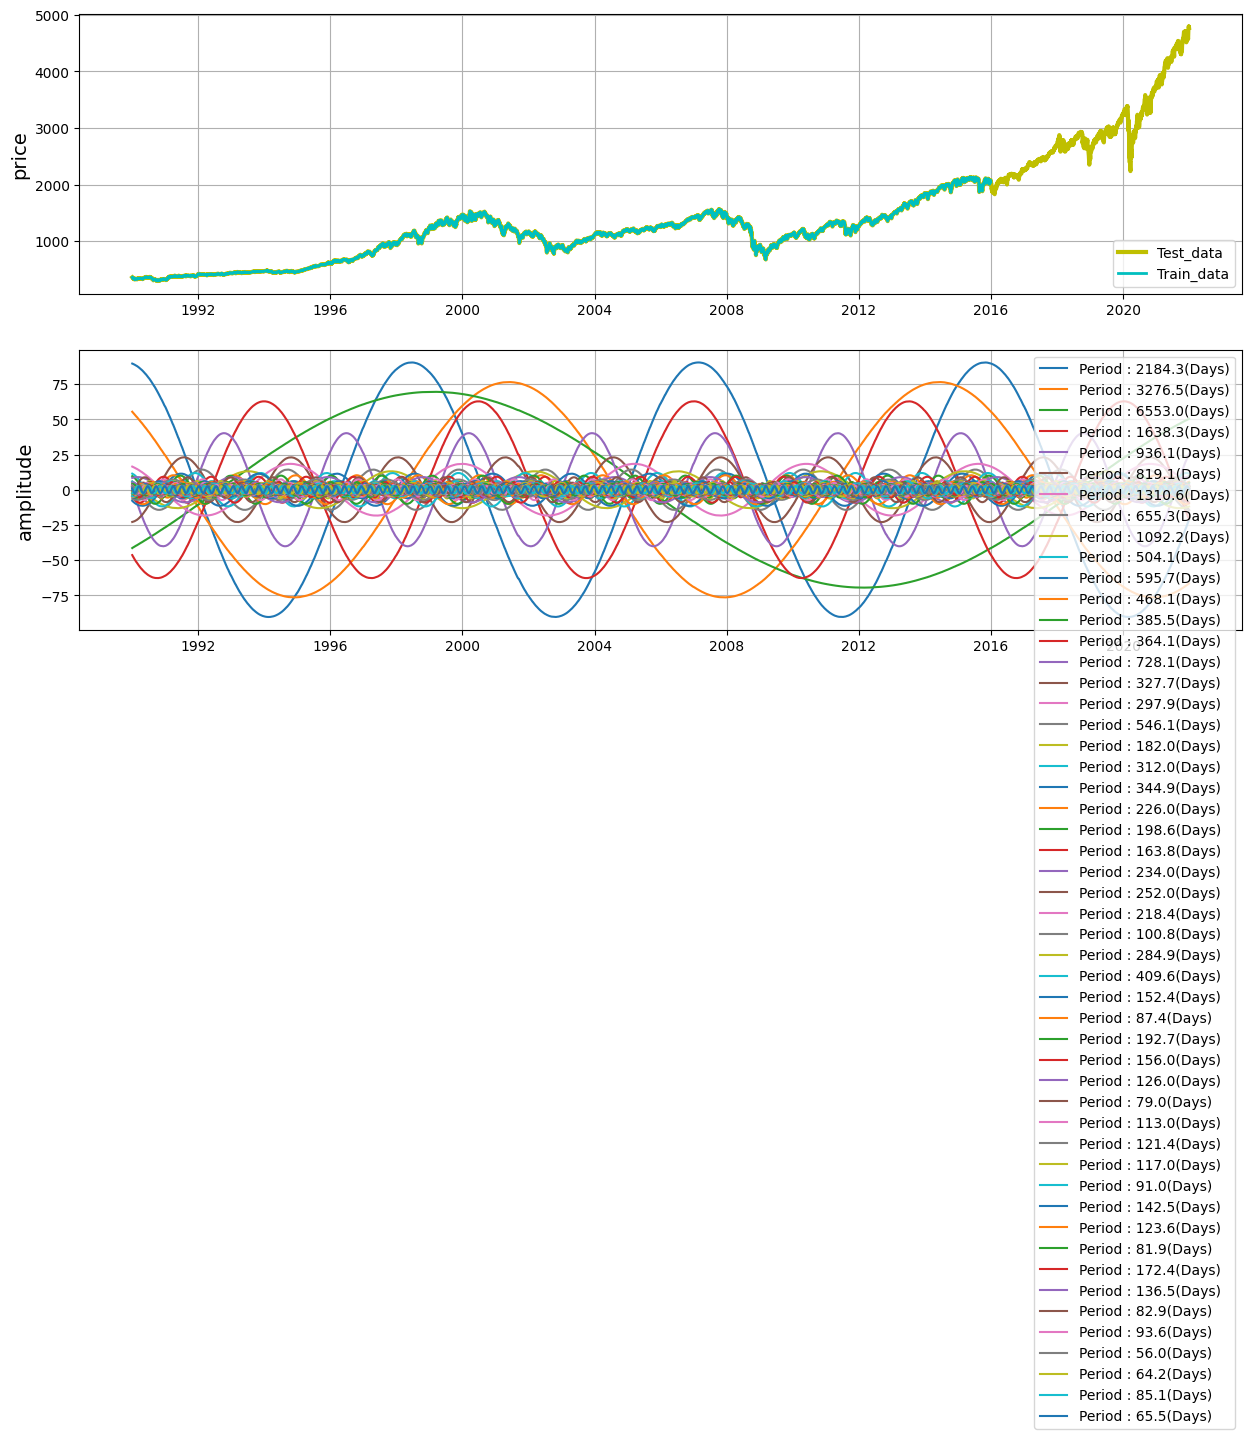

In [157]:

fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
# axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
# axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# for i, label in enumerate(li_peak):
#     axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(price2.index,signal2,label=signal_df['period'].at[i])
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
axes[1].legend(loc=0)
# pl.legend()
plt.show()


# 10.2 plot prices and signals and re_signal

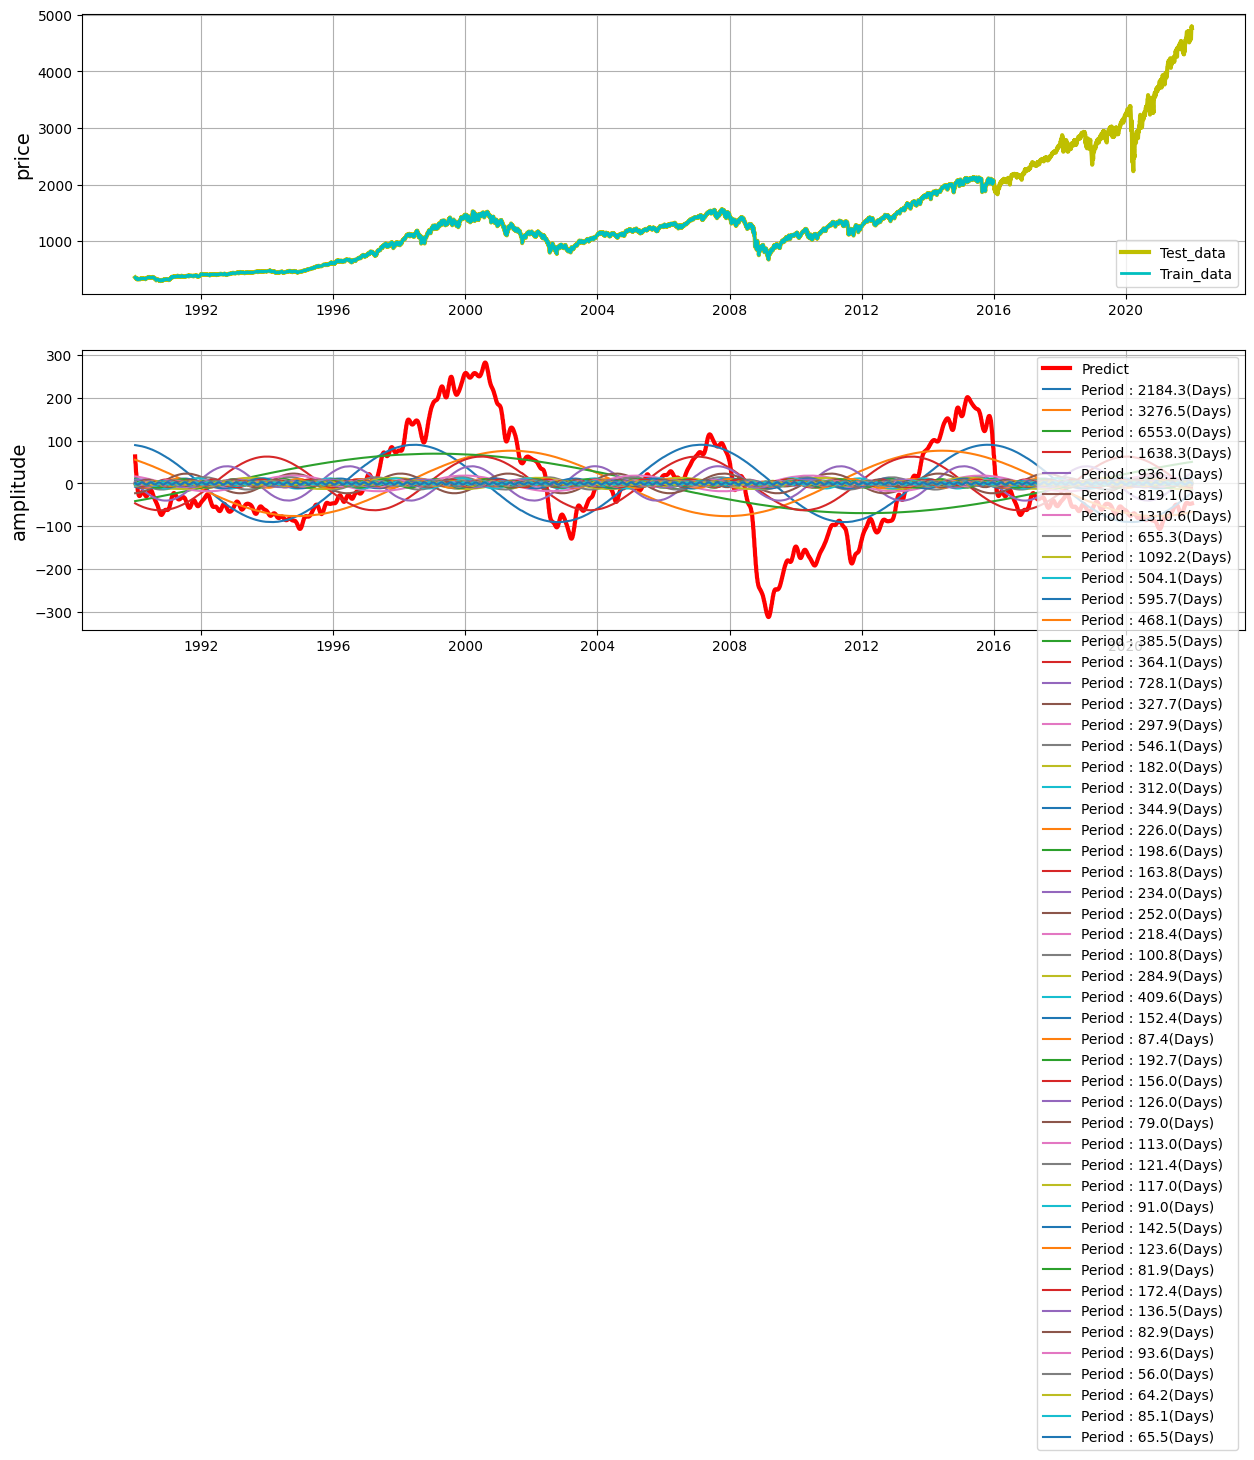

In [158]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
# axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# for i, label in enumerate(li_peak):
#     axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(price2.index,signal2,label=signal_df['period'].at[i])
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
axes[1].legend(loc=0)
# pl.legend()
plt.show()


# 10.3 plot peaks and vallys

In [159]:
# fig, axes = plt.subplots(2, 1, figsize=(15, 8))
# axes[0].plot(price2.index, x2, 'b', linewidth=3, label='Test_data')
# axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
# axes[0].set_ylabel("price", fontsize=14)
# axes[0].grid(True)
# axes[1].plot(price2.index, signal, 'r', label='Predict')
# axes[1].grid(True)
# axes[1].set_ylabel("amplitude", fontsize=14)
# # axes[0].plot(price.index,price,'r',label='original values')
# axes[0].plot(peaks.index,peaks,'*',label='polyfit values')
# axes[0].plot(valleys.index,valleys,'*',label='polyfit values')
# axes[1].plot(peaks2.index,peaks2,'*',label='polyfit values')
# axes[1].plot(valleys2.index,valleys2,'*',label='polyfit values')

# plt.legend(loc=4)
# pl.legend()
# plt.show()


# 10.4 plot peaks and delays

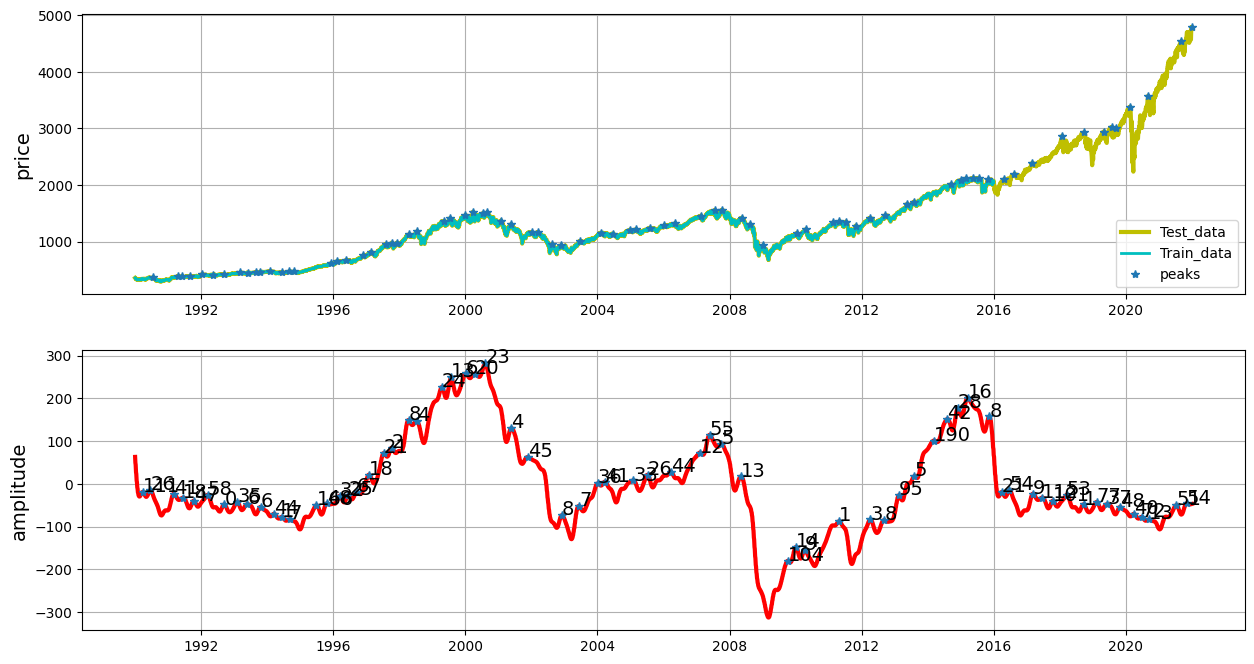

In [160]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
# axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
# axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
# for i, label in enumerate(li_valley):
#     axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


# 10.5 plot valleys and delays


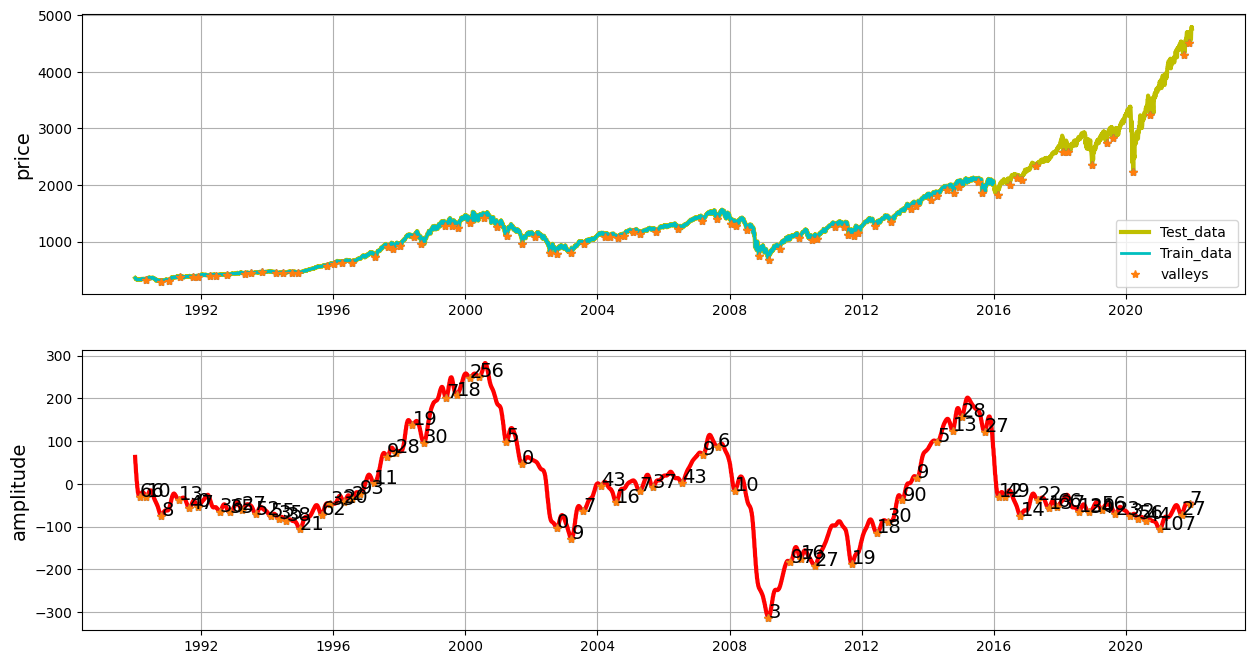

In [161]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(valleys.index,valleys,'*')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data6.index , data6['valleys_2'],'*')
axes[1].plot(valleys2.index,valleys2,'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


# 10.6 plot peaks and valleys and delays

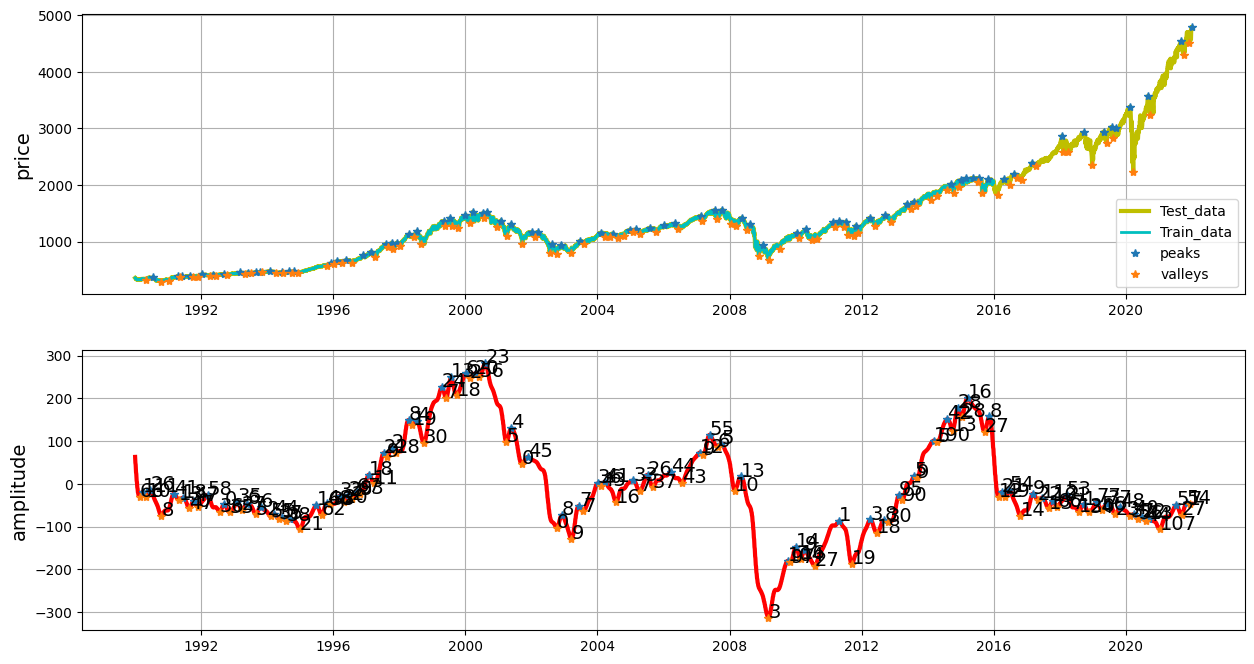

In [162]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()


# 10.7 plot all

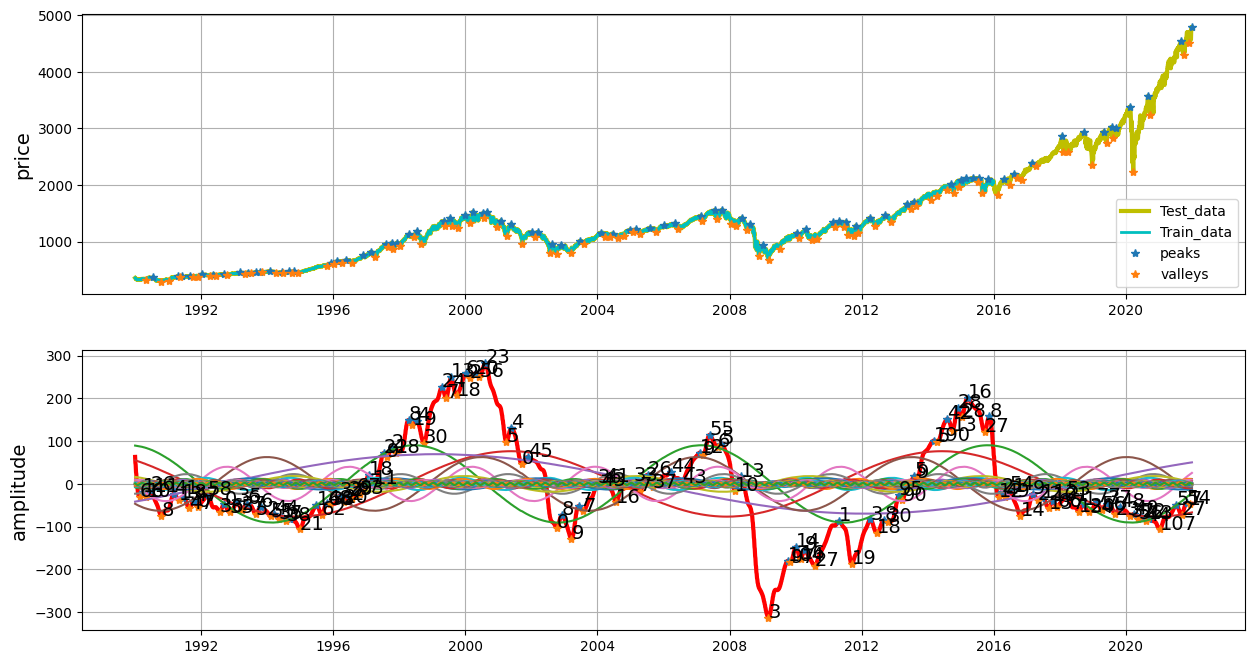

In [163]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].plot(price2.index, x2, 'y', linewidth=3, label='Test_data')
axes[0].plot(price.index, x, 'c', linewidth=2, label='Train_data')
axes[0].set_ylabel("price", fontsize=14)
axes[0].grid(True)
axes[1].plot(price2.index, signal, 'r', label='Predict',linewidth=3)
axes[1].grid(True)
axes[1].set_ylabel("amplitude", fontsize=14)
# axes[0].plot(price.index,price,'r',label='original values')
axes[0].plot(peaks.index,peaks,'*',label='peaks')
axes[0].plot(valleys.index,valleys,'*',label='valleys')
axes[1].plot(data4.index , data4['peaks_2'],'*',label='peaks')
axes[1].plot(data6.index , data6['valleys_2'],'*',label='valleys')
for i, label in enumerate(li_valley):
    axes[1].annotate(label, (data6.index[i],  data6['valleys_2'][i]),fontsize=14)
for i, label in enumerate(li_peak):
    axes[1].annotate(label, (data4.index[i],  data4['peaks_2'][i]),fontsize=14)
for i in range(0,len(signal_df)):
    signal2 = signal_df['ampli'].at[i] * np.cos(2 * np.pi * signal_df['f'].at[i] * t + signal_df['phase'].at[i])
    axes[1].plot(price2.index,signal2)
# plt.show()
# plt.legend(loc=4)
axes[0].legend(loc=4)
# axes[1].legend(loc=4)
# pl.legend()
plt.show()
